In [139]:
import cv2
from imutils import paths
import numpy as np

from src.constant.app_constants import AppConstants
from src.machine_learning.model.svm_model_training_config import SvmModelTrainingConfig
from src.util.file_system_utils import FileSystemUtils
from src.machine_learning.ml_utils import quantify_image, fd_hu_moments


In [140]:
def extract_feature(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    ft1 = quantify_image(image)
    ft2 = fd_hu_moments(image)
    return np.hstack([ft1, ft2])

In [141]:
def split_data(dataset_path) -> tuple:
    training_images_paths = list(paths.list_images(dataset_path))
    labels = [img_path.split(FileSystemUtils.get_os_path_separator())[-2] for img_path in training_images_paths]
    for i in range(len(labels)):
        label = str(labels[i])
        if label == '0':
            labels[i] = 5
        elif label == '1':
            labels[i] = 10
        elif label == '2':
            labels[i] = 1
    input_features = [extract_feature(img) for img in training_images_paths]
    return np.array(input_features), np.array(labels)

In [142]:
x_train, y_train = split_data(AppConstants.training_dataset_directory)
print(y_train)

[10 10 10 ...  5  5  5]


In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train the SVR model
model = SVR()
model.fit(x_train, y_train)

SVR()

In [144]:
from sklearn.metrics import accuracy_score

x_test, y_test = split_data(AppConstants.testing_dataset_directory)
y_pred = model.predict(x_test)
print(y_pred)

[ 8.46490222  6.91844291  7.68573207  8.80016859  7.90681623  8.00631497
  7.53138432  7.57709662  6.37133415  7.96452094  9.37874998  9.75004023
  7.90681623  5.47047058  9.08438791  7.63345857  5.84117975  8.08182942
  7.72095749  7.69057172  9.12920938  7.78426177  3.51036189  8.11539567
  8.27330003  7.72350455  8.16104443  7.84650068  7.39085821  8.20196863
  9.05710336  7.53138432  7.7247684   4.02915363  8.02837686  6.43475106
  7.90381154  9.90043401  8.36365714  9.05710336  7.67515274  3.91994334
  8.69312057  8.20932062  8.23031624  7.90381154  7.33527636  3.94106555
  9.90001909  8.07146937  3.23402126 10.10019949  9.37874998  8.03611058
  5.84117975  8.92028327  8.92028327  7.39986146  7.94192363  9.90043401
  3.4137992   7.57709662  8.73659274  4.02915363  9.90000965  8.27645587
  7.7247684   7.84650068  7.33527636  7.73548582  7.70730808  7.67515274
  5.47047058  8.32732171  3.68548039  8.73659274  7.72095749  7.73548582
  8.14287854  8.92028327  5.7752332   7.66412547  7

In [145]:
y_pred = [int(round(e)) for e in y_pred]
print(y_pred)

[8, 7, 8, 9, 8, 8, 8, 8, 6, 8, 9, 10, 8, 5, 9, 8, 6, 8, 8, 8, 9, 8, 4, 8, 8, 8, 8, 8, 7, 8, 9, 8, 8, 4, 8, 6, 8, 10, 8, 9, 8, 4, 9, 8, 8, 8, 7, 4, 10, 8, 3, 10, 9, 8, 6, 9, 9, 7, 8, 10, 3, 8, 9, 4, 10, 8, 8, 8, 7, 8, 8, 8, 5, 8, 4, 9, 8, 8, 8, 9, 6, 8, 8, 8, 8, 9, 8, 4, 9, 8, 8, 8, 10, 8, 6, 7, 8, 8, 8, 8, 8, 8, 7, 8, 9, 9, 6, 8, 8, 8, 6, 4, 7, 8, 4, 8, 9, 8, 8, 10, 6, 10, 4, 8, 8, 8, 8, 8, 8, 10, 9, 8, 8, 8, 7, 8, 8, 8, 8, 10, 8, 3, 10, 8, 8, 9, 4, 8, 8, 4, 8, 9, 9, 8, 10, 4, 4, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 9, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 4, 8, 9, 8, 8, 8, 10, 10, 4, 8, 8, 8, 3, 10, 10, 6, 5, 10, 9, 8, 8, 4, 8, 8, 8, 8, 10, 8, 8, 10, 8, 3, 3, 10, 8, 4, 8, 8, 8, 3, 6, 3, 9, 9, 8, 7, 4, 9, 8, 10, 9, 4, 8, 8, 8, 4, 10, 8, 3, 8, 10, 8, 9, 7, 3, 8, 4, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 9, 7, 8, 8, 9, 8, 8, 8, 8, 8, 3, 8, 8, 6, 8, 9, 10, 3, 6, 6, 9, 9, 10, 6, 8, 10, 9, 9, 8, 4, 8, 4, 8, 8, 8, 4, 6, 8, 10, 8, 7, 8, 8, 4, 6, 8, 8, 8, 8, 9, 9, 9, 8, 8, 8, 9, 6, 8, 8, 4, 9, 8, 8, 6, 

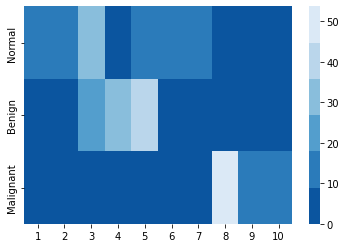

In [146]:
import seaborn as sns
from matplotlib import pyplot as plt

def get_col(e):
    if e==1:
        return 0
    elif e==5:
        return 1
    elif e==10:
        return 2

data = np.zeros(shape=(3, 10))
totals=np.zeros(shape=3)
for i in range(len(y_test)):
    col=get_col(y_test[i])
    data[col][y_pred[i]-1] += 1
    totals[col]+=1
for i in range(3):
    for j in range(10):
        tot=totals[i]
        data[i][j]=(data[i][j]/tot)*100

colormap = sns.color_palette("Blues_r")
ax = sns.heatmap(data, cmap=colormap, yticklabels=["Normal", "Benign", "Malignant"], xticklabels=[str(i+1) for i in range(10)])
plt.show()